In [5]:
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from core.dataset import EssayDataset
from utils.text import to_sentences

In [2]:
dataset = EssayDataset()

Loading essays...
Collating essays and labels...


100%|██████████| 15594/15594 [04:35<00:00, 56.55it/s]

Essay dataset created with 15594 essays.


In [2]:
label_counter = Counter()

small_dataset = EssayDataset(n_essays=700)
polarity_dataset = small_dataset.make_polarity_dataset()
for pair, label in polarity_dataset:
    label_counter[label.item()] += 1
print(label_counter)

essay = small_dataset[600]
for pair, label in zip(*essay.polarity_pairs()):
    print(pair[0])
    print(pair[1])
    print(label)
    print('---')


Loading data for 700 essays
Collating essays and labels...


100%|██████████| 700/700 [00:02<00:00, 285.39it/s]


Essay dataset created with 700 essays.
Polarity Dataset Created with 8499 pairs.
Counter({1.0: 3644, 0.0: 2757, -1.0: 2098})
They say the reason they do this is because they feel as if they are safe and wont crash,
but some of them have admitted that they have been involved in an accident. 
-1
---
Some people feel as if sending a simple text won't do any harm so it's fine to respond or if someone is calling they should pick it up rather than let it ring. 
Using your phone while driving is a very dangerous thing to do because it can cause a lot of damage and can make some people pay lots of money.
-1
---
There are many different consequences
some can be $20-$500 but if you kill or harm others than if can be jail or prison time all the way up to life in prison one thing that can happen is you can kill yourself doing this or kill a kid who could grow up to be the president or the person to find the cure for cancer or just a very important person. Using you phone might not get you killed b

Loading data for 2000 essays
Collating essays and labels...


100%|██████████| 2000/2000 [00:02<00:00, 739.51it/s]


Essay dataset created with 2000 essays.


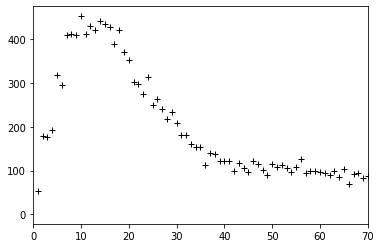

In [4]:
dataset = EssayDataset(n_essays=2000)

# words in argument histogram
words_counter = Counter()

for idx, essay in enumerate(dataset):
    for _, row in essay.labels.iterrows():
        n_words = len(row.loc['predictionstring'].split())
        words_counter[n_words] += 1

xs = []
ys = []



for x, y in iter(words_counter.items()):
    xs.append(x)
    ys.append(y)
fig, ax = plt.subplots()
ax.plot(xs, ys, 'k+')
plt.xlim([0,70])
plt.show()

In [ ]:
# sentence histogram
sentences_counter = Counter()

for essay in dataset:
    with open(essay.path) as f:
        essay_text = f.read()
        sentences_counter[len(to_sentences(essay_text))] += 1

xs = []
ys = []
for x, y in iter(sentences_counter.items()):
    xs.append(x)
    ys.append(y)
fig, ax = plt.subplots()
ax.plot(xs, ys, 'k+')
plt.show()

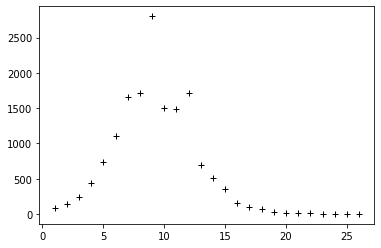

In [5]:
# argument histogram
args_counter = Counter()

for essay in dataset:
    args_counter[len(essay.labels)] += 1

xs = []
ys = []
for x, y in iter(args_counter.items()):
    xs.append(x)
    ys.append(y)
fig, ax = plt.subplots()
ax.plot(xs, ys, 'k+')
plt.show()